# **Laboratorio 12: Funciones de pérdida en el modelo de Regresión Lineal**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340 Fundamentos del machine learning**

**Nombres de los integrantes**


1.   Alejandro Narváez - 202123110
2.   Ali Cifci - 202210698

**Número del grupo**

LabML-4 10

# **1. Norma L2 como función de pérdida**

En el laboratorio anterior iniciamos el estudio del modelo de Regresión Lineal como herramienta de modelamiento y filtrado de datos. Para obtener el valor de los coeficientes óptimos $\beta$ que mejor ajustan los datos, tomamos como punto de partida un problema de optimización de mínimos cuadrados entre la predicción y el valor real de la variable independiente:

\begin{align*}
  \min_\beta ||y-H\beta||_2^2
 \end{align*}

 > 1. *Resolver el problema de minimos cuadrados es equivalente a minimizar el cuadrado de la norma $L2$ como función de pérdida.*

Bajo esta elección, el problema puede resolverse de forma analítica y los valores de $\beta$ que minimizan la función de pérdida están dados por la expresión:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
\end{align*}

*Es importante aclarar que, por lo general, se utiliza la norma $L2$ como medida de rendimiento (función de pérdida) en problemas de Regresión. Sin embargo, minimizar MSE (el cuadrado de la norma $L2$) permite resolver el problema de forma analítica y conduce al mismo resultado, puesto que minimizar una función implica minimizar también su raíz cuadrada. [1]*

# **2. Norma L1 como función de pérdida**

Existen algunos escenarios en los que utilizar la norma $L2$ como medida de rendimiento no resulta ventajoso. En este laboratorio vamos a explorar dichos escenarios. Una función de pérdida alternativa que suele plantearse en los problemas de Regresión es la norma $L1$ (también conocida como Error Absoluto Medio (MAE en inglés) o norma Manhattan):

\begin{align*}
  \min_\beta ||y-H\beta||_1
 \end{align*}

Bajo esta elección, la minimización de la función de pérdida busca reducir el error entendido como el valor absoluto de la diferencia entre el valor real de la variable independiente $y$ y la predicción del modelo $H\beta$. A diferencia de la optimización basada en mínimos cuadrados, el uso de la norma $L1$ como función de pérdida no permite calcular el valor óptimo de los coeficentes $\beta$ de forma analítica por lo que se hace necesario recurrir a métodos de minimización numérica para estimar su valor, tales como los que proporciona la libreria *optimize* de Python.

# **Ejercicios**

1. Importe los datos X y Y contenidos en el archivo *reg_1.mat*. Recuerde que este formato se importa como un diccionario en donde la llave "x" corresponde a los valores medidos para la variable independiente y la llave "y" a los valores de la variable dependiente.

In [5]:
from scipy.io import loadmat

# Cargar el archivo .mat
data = loadmat('C:/Users/alejo/OneDrive/Documents/°U/Machine Learning/Fundamentos de Machine learning/Laboratorio/Labs_Mach_L/Lab_machine/Archivos/reg_1.mat')

# Extraer las variables x e y
x = data['x'].flatten()  # Asegurarnos de que x sea un vector 1D
y = data['y'].flatten()  # Asegurarnos de que y sea un vector 1D

2. Obtenga los coeficientes óptimos $\beta$ para una relación polinómica de grado 3 entre X y Y haciendo uso de la solución analítica.

In [ ]:
import numpy as np

# Crear la matriz de diseño H para un polinomio de grado 3
n = len(x)
H = np.vstack([np.ones(n), x, x**2, x**3]).T  # Matriz n x 4: [1, x, x^2, x^3]

# Calcular beta usando la solución analítica: beta = (H^T H)^(-1) H^T y
H_T = H.T  # Transpuesta de H
beta = np.linalg.inv(H_T @ H) @ H_T @ y

print("Coeficientes óptimos beta (para el polinomio de grado 3):")
print(f"beta_0 (intercepto): {beta[0]}")
print(f"beta_1 (x): {beta[1]}")
print(f"beta_2 (x^2): {beta[2]}")
print(f"beta_3 (x^3): {beta[3]}")

Coeficientes óptimos beta (para el polinomio de grado 3):
beta_0 (intercepto): -3.324738393071156
beta_1 (x): 9.433534046391394
beta_2 (x^2): -4.835215341776443
beta_3 (x^3): 0.8325559371761551


3. Ahora minimice la norma $L1$ para encontrar los coeficientes óptimos $\beta$ de la relación entre X y Y establecida en el punto anterior. Utilice la función *minimize* de la librería *scipy.optimize*.

In [8]:
from scipy.optimize import minimize

# Definir la función de pérdida (norma L1)
def l1_loss(beta, H, y):
    predictions = H @ beta  # H * beta
    return np.sum(np.abs(y - predictions))  # ||y - H*beta||_1

# Valor inicial para beta (inicializamos en ceros)
beta_initial = np.zeros(4)

# Minimizar la función de pérdida usando scipy.optimize.minimize
result = minimize(l1_loss, beta_initial, args=(H, y), method='L-BFGS-B')

# Obtener los coeficientes óptimos
beta_l1 = result.x

print("Coeficientes óptimos beta (usando norma L1):")
print(f"beta_0 (intercepto): {beta_l1[0]}")
print(f"beta_1 (x): {beta_l1[1]}")
print(f"beta_2 (x^2): {beta_l1[2]}")
print(f"beta_3 (x^3): {beta_l1[3]}")

Coeficientes óptimos beta (usando norma L1):
beta_0 (intercepto): -3.3451811728845415
beta_1 (x): 9.992979294220982
beta_2 (x^2): -5.278054180567358
beta_3 (x^3): 0.9144790348084901


4. Grafique la dispersión de los datos X y Y, acompañada de las curvas de regresión correspondientes al ajuste obtenido para las normas $L2$ y $L1$.

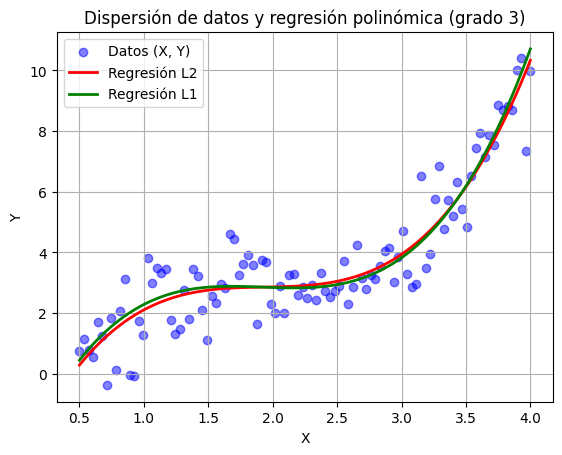

In [11]:
import matplotlib.pyplot as plt
beta_l2 = np.linalg.inv(H_T @ H) @ H_T @ y

# 1. Dispersión de los datos
plt.scatter(x, y, color='blue', label='Datos (X, Y)', alpha=0.5)

# 2. Curvas de regresión
# Para graficar las curvas, generamos puntos x más densos para una línea suave
x_smooth = np.linspace(min(x), max(x), 100).reshape(-1, 1)  # 100 puntos entre min(x) y max(x)
H_smooth = np.vstack([np.ones(len(x_smooth)), x_smooth.flatten(), x_smooth.flatten()**2, x_smooth.flatten()**3]).T

# Predicciones con L2
y_l2 = H_smooth @ beta_l2
plt.plot(x_smooth, y_l2, color='red', label='Regresión L2', linewidth=2)

# Predicciones con L1
y_l1 = H_smooth @ beta_l1
plt.plot(x_smooth, y_l1, color='green', label='Regresión L1', linewidth=2)

# Configuración del gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dispersión de datos y regresión polinómica (grado 3)')
plt.legend()
plt.grid(True)
plt.show()

5. Repita los ejercicios 1 al 4 utilizando ahora los datos contenidos en el archivo *reg_2.mat*.

Coeficientes óptimos beta (usando norma L2):
beta_0 (intercepto): -4.828976282913462
beta_1 (x): 9.537341823536394
beta_2 (x^2): -3.2508743513404217
beta_3 (x^3): 0.428292247404364

Coeficientes óptimos beta (usando norma L1):
beta_0 (intercepto): -5.459156524093676
beta_1 (x): 12.945369038664687
beta_2 (x^2): -6.319967507840923
beta_3 (x^3): 1.0234915496400057



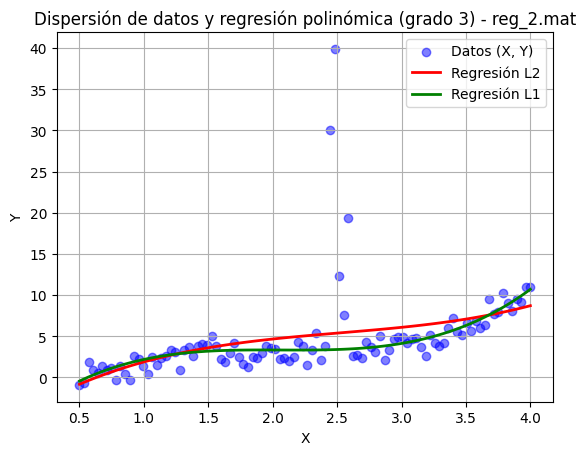

In [13]:
# Punto 1: Importar los datos de reg_2.mat
data = loadmat('C:/Users/alejo/OneDrive/Documents/°U/Machine Learning/Fundamentos de Machine learning/Laboratorio/Labs_Mach_L/Lab_machine/Archivos/reg_2.mat')
x = data['x'].flatten()  # Vector 1D
y = data['y'].flatten()  # Vector 1D

# Crear la matriz de diseño H para un polinomio de grado 3
n = len(x)
H = np.vstack([np.ones(n), x, x**2, x**3]).T  # Matriz n x 4: [1, x, x^2, x^3]

# Punto 2: Norma L2 (solución analítica)
H_T = H.T
beta_l2 = np.linalg.inv(H_T @ H) @ H_T @ y
print("Coeficientes óptimos beta (usando norma L2):")
print(f"beta_0 (intercepto): {beta_l2[0]}")
print(f"beta_1 (x): {beta_l2[1]}")
print(f"beta_2 (x^2): {beta_l2[2]}")
print(f"beta_3 (x^3): {beta_l2[3]}")
print()

# Punto 3: Norma L1 (usando minimize)
def l1_loss(beta, H, y):
    predictions = H @ beta
    return np.sum(np.abs(y - predictions))

beta_initial = np.zeros(4)
result = minimize(l1_loss, beta_initial, args=(H, y), method='L-BFGS-B')
beta_l1 = result.x
print("Coeficientes óptimos beta (usando norma L1):")
print(f"beta_0 (intercepto): {beta_l1[0]}")
print(f"beta_1 (x): {beta_l1[1]}")
print(f"beta_2 (x^2): {beta_l1[2]}")
print(f"beta_3 (x^3): {beta_l1[3]}")
print()

# Punto 4: Graficar dispersión y curvas de regresión
# Dispersión de los datos
plt.scatter(x, y, color='blue', label='Datos (X, Y)', alpha=0.5)

# Curvas de regresión
x_smooth = np.linspace(min(x), max(x), 100).reshape(-1, 1)  # 100 puntos entre min(x) y max(x)
H_smooth = np.vstack([np.ones(len(x_smooth)), x_smooth.flatten(), x_smooth.flatten()**2, x_smooth.flatten()**3]).T

# Predicciones con L2
y_l2 = H_smooth @ beta_l2
plt.plot(x_smooth, y_l2, color='red', label='Regresión L2', linewidth=2)

# Predicciones con L1
y_l1 = H_smooth @ beta_l1
plt.plot(x_smooth, y_l1, color='green', label='Regresión L1', linewidth=2)

# Configuración del gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dispersión de datos y regresión polinómica (grado 3) - reg_2.mat')
plt.legend()
plt.grid(True)
plt.show()

6. Compare el ajuste entre las regresiones que minimizan la norma $L1$ y la norma $L2$ para los dos conjuntos de datos. ¿Qué ocurre con el ajuste cuando hay *outliers*$^1$ o anomalías entre los datos? ¿Cúal de las dos funciones de pérdida responde mejor a la presencia de este tipo de datos? Refiérase al efecto de penalización que ocurre en cada caso.

 > 2. *En términos simples, un outlier es una medición extremadamente alta o baja en relación con el conjunto de datos con los que se está trabajando. Un dato atípico.*

La razón por la que la regresión L1 se ajusta mejor a la tendencia de los datos en reg_2.mat, mientras que en reg_1.mat ambas normas (L1 y L2) dan resultados similares, se debe a la presencia de valores atípicos o mayor ruido en reg_2.mat. La norma L2 castiga los errores grandes de manera más severa, dándoles mucha importancia, lo que hace que la curva se desvíe hacia esos valores atípicos y se aleje de la tendencia principal de los datos. Por otro lado, la norma L1 trata los errores de forma más equilibrada, sin darles un peso exagerado a los valores atípicos, lo que permite un ajuste más estable y fiel a la mayoría de los datos. Por eso, en reg_2.mat, donde hay más valores atípicos, L1 refleja mejor la tendencia general, mientras que en reg_1.mat, con menos anomalías, ambas normas se comportan de manera parecida.

**Referencias**

[1]. Géron, Aurelien. *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*. Second Edition, 2019. Chapter 4 (Training Models). Page 116.